# Explore here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv",sep=";")
df.head()




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#vamos a eliminar las variables que consideremos que no son importantes 
#en este acaso es dificil discriminar que variables no son importantes, ya que a simplevista pueden parecer poco transendentes, pero debemos ver su comportamiento antes de tomar una desicion 
#lo que haremos entonces, sera factorizar las variables objeto
objetos=[]
df_num=pd.DataFrame()
for i in df.columns:
    if df[i].dtype == "object":
        objetos.append(i)
        df_num[i]=pd.factorize(df[i])[0]
    else:
        df_num[i]=df[i]
print(objetos)
df_num.info()
df_num.head()
#creamos un dataframe llamado df_num que contiene todos los datos factorizados.


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


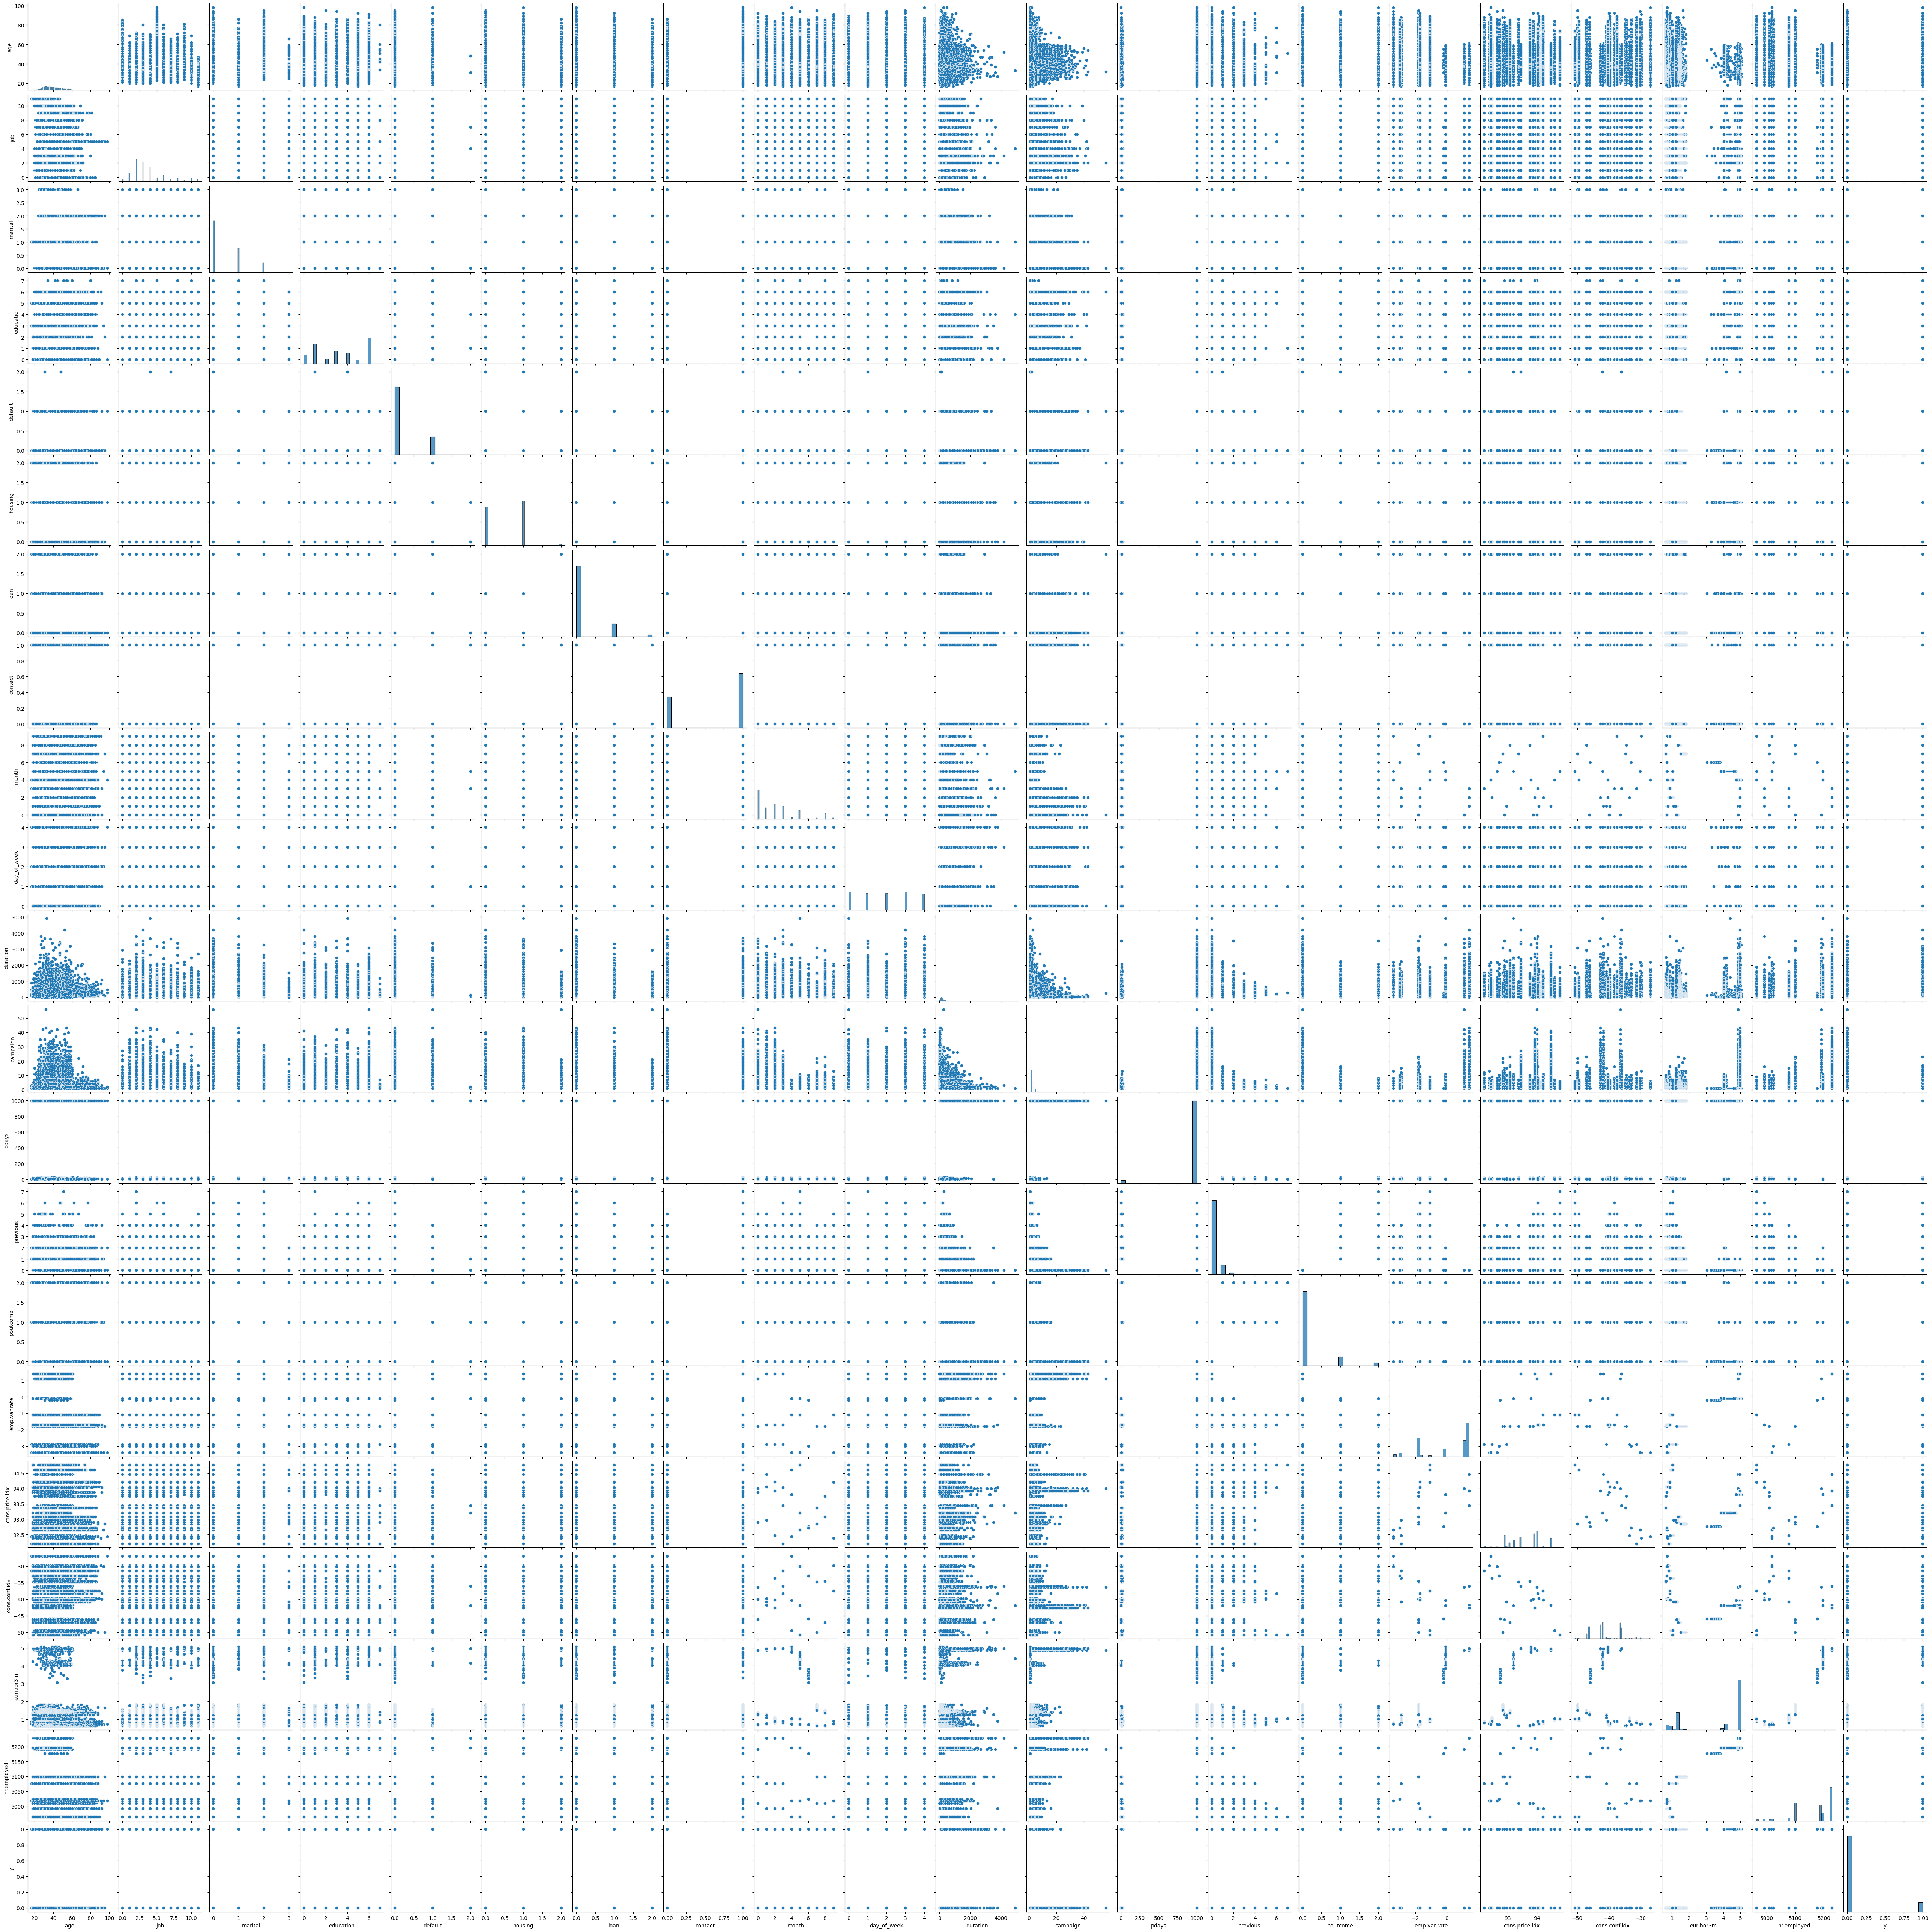

In [6]:
#un pairplot para ver algunas relaciones
sns.pairplot(df_num)

<Axes: >

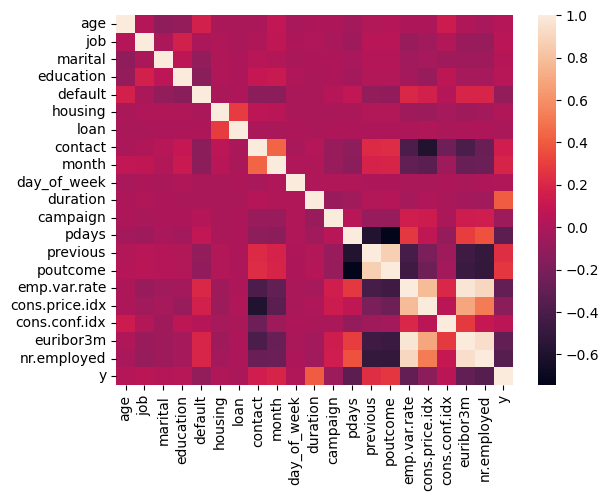

In [7]:
sns.heatmap(df_num.corr())

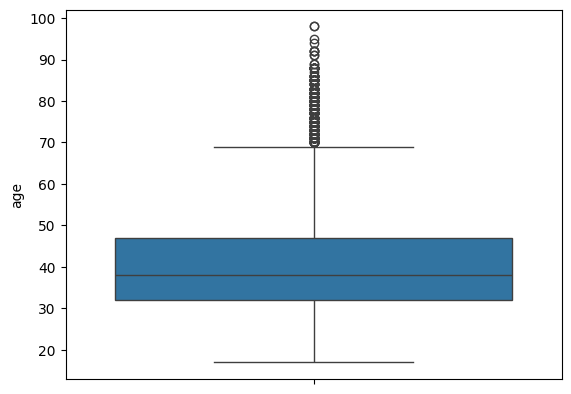

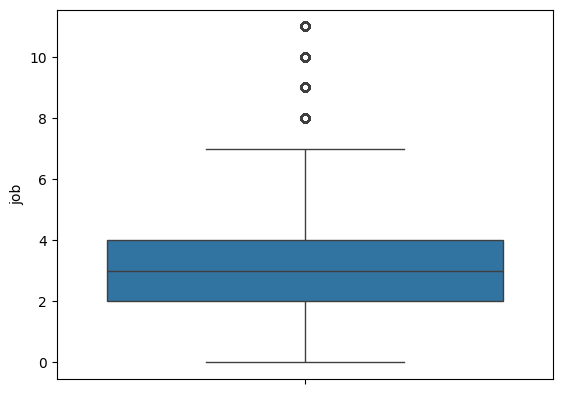

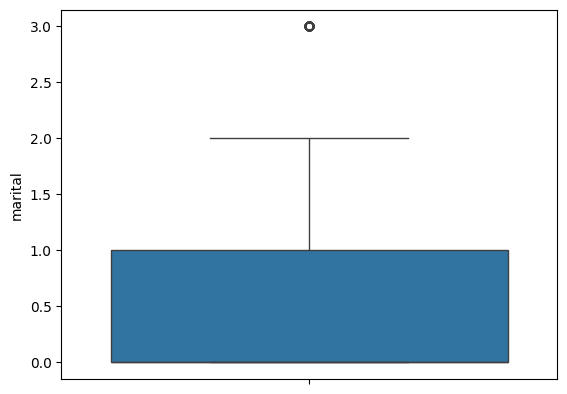

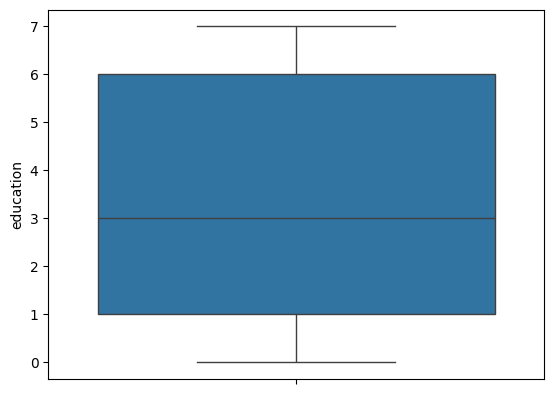

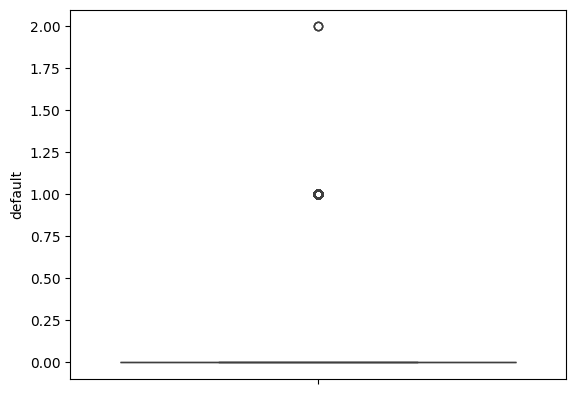

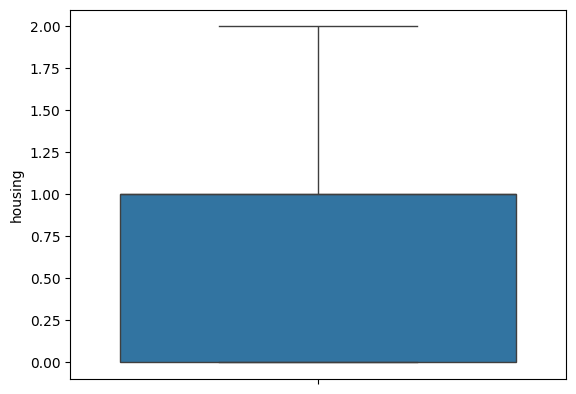

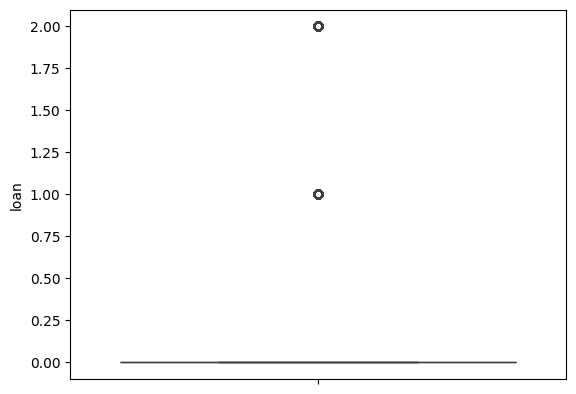

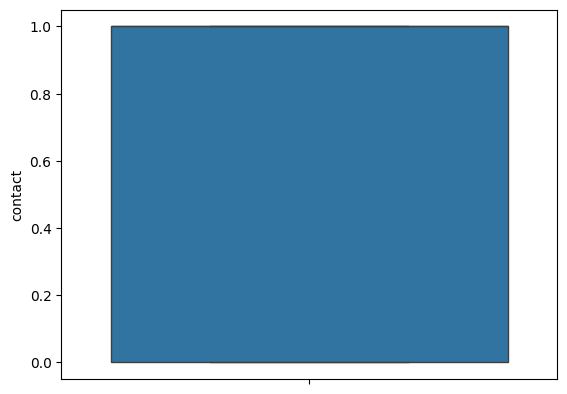

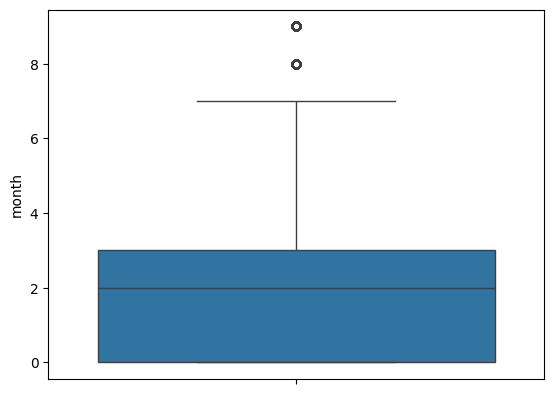

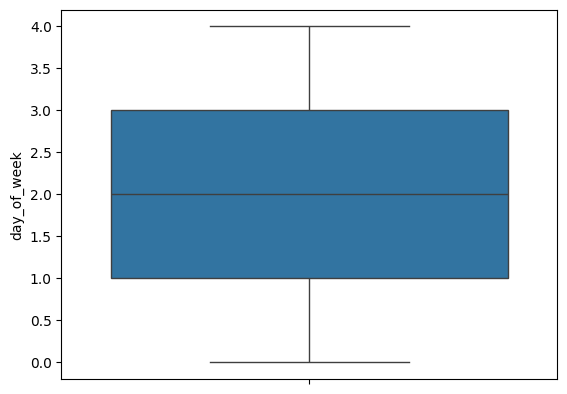

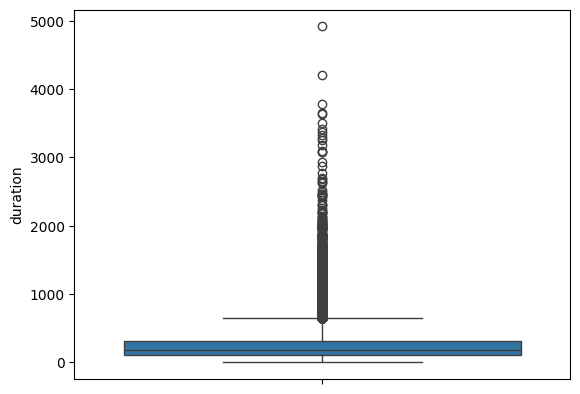

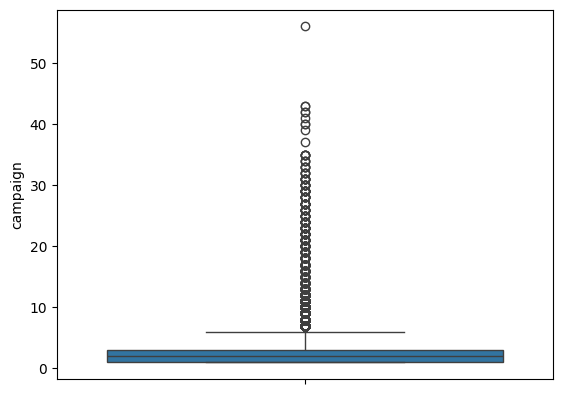

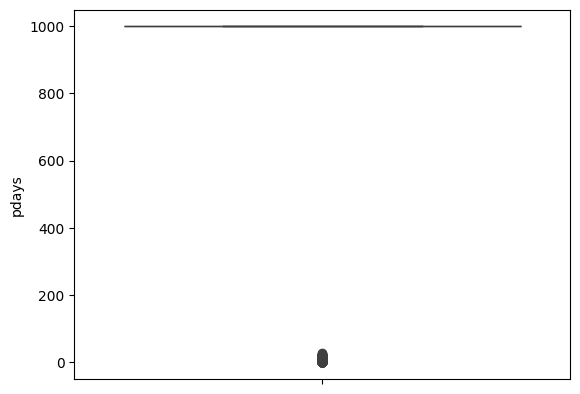

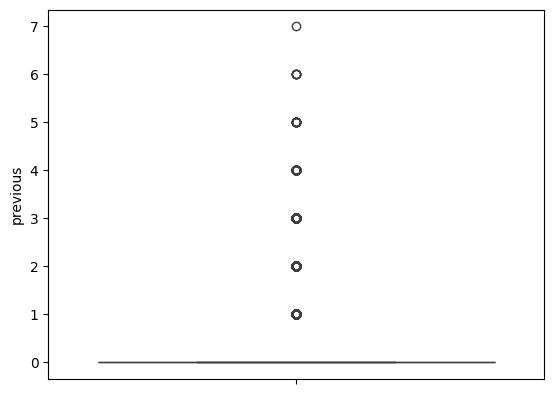

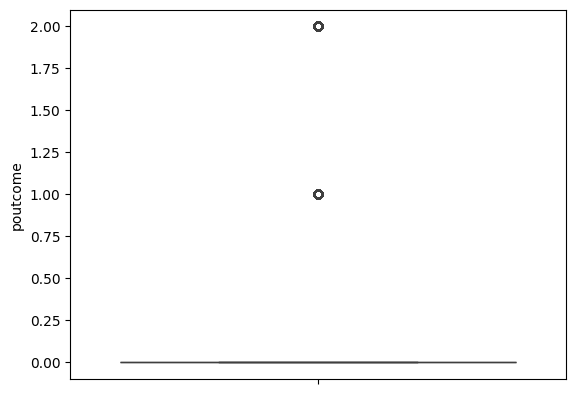

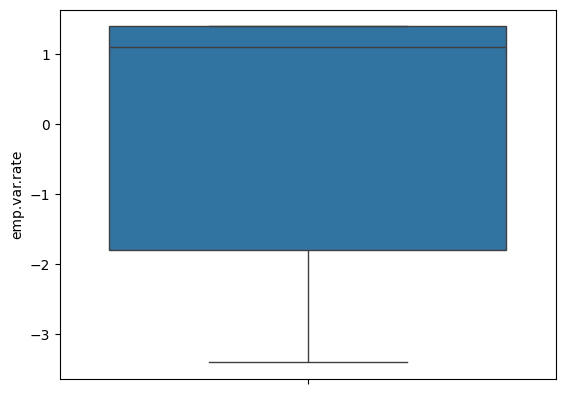

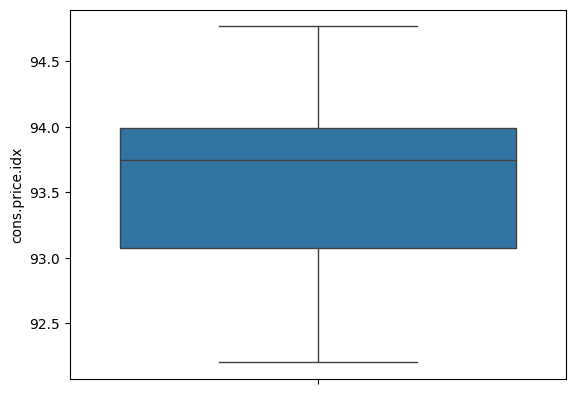

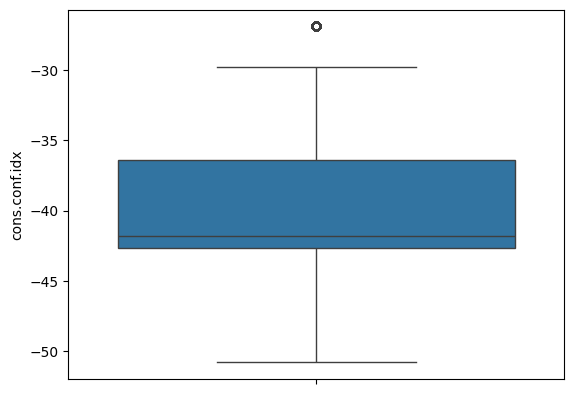

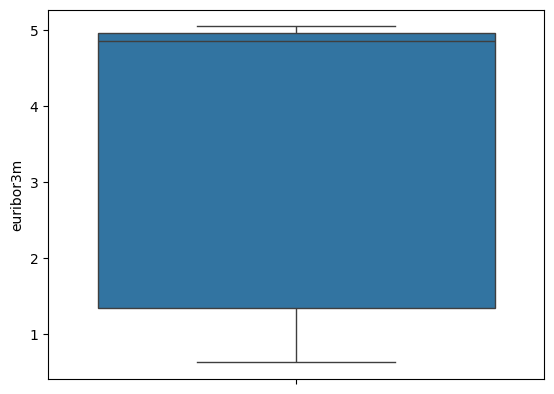

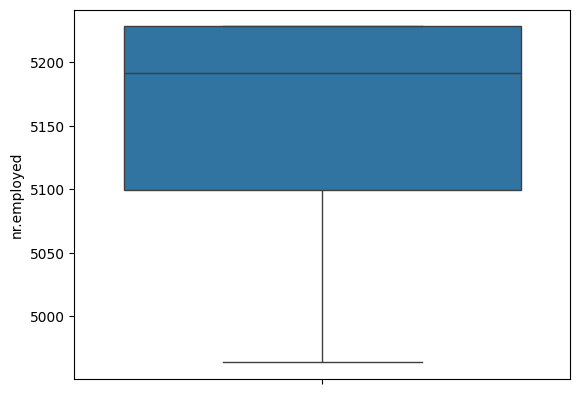

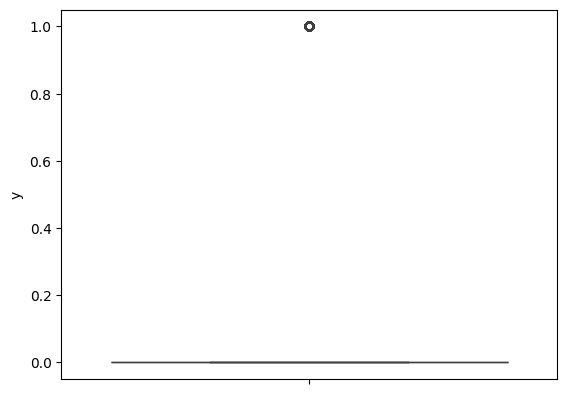

In [8]:
for i in df_num.columns:
    sns.boxplot(data=df_num[i])
    plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=df_num.drop("y",axis=1)
y=df_num["y"]


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)#separar mis x e y de entrenamiento
escalador=MinMaxScaler()
X_train_esc=escalador.fit_transform(X_train)#se usa fit_transform para que el modelo aprenda de esos datos y luego los normalice 
X_test_esc=escalador.transform(X_test)#aqui se usa solo transform porque el modelo no debe conocer el valor de estos datos
#ahora debo transformarlos en dataframes
X_train_esc=pd.DataFrame(X_train_esc,columns=X.columns,index=X_train.index)
X_test_esc=pd.DataFrame(X_test_esc,columns=X.columns,index=X_test.index)




In [11]:
from sklearn.feature_selection import chi2, SelectKBest
selection_model=SelectKBest(chi2,k=10)#aqui esta seleccionando los mejores 10 parametros, segun el modelo estadistico chi2
selection_model.fit(X_train_esc,y_train)
ix=selection_model.get_support()
#se hacen los dataframe con los x seleccionados
X_train_select=pd.DataFrame(selection_model.transform(X_train_esc),columns=X_train_esc.columns.values[ix])
X_test_select=pd.DataFrame(selection_model.transform(X_test_esc),columns=X_test_esc.columns.values[ix])


In [12]:
model=LogisticRegression()
model.fit(X_train_select,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
y_pred=model.predict(X_test_select)
y_pred


array([0, 0, 0, ..., 0, 0, 0], shape=(32951,))

In [14]:
accuracy_score(y_test,y_pred)

0.9066796151861856

In [15]:
#ahora intentaremos mejorar el modelo cambiando los hyperparametros 

from sklearn.model_selection import GridSearchCV
hyper={
    "C":[0.001,0.00156,0.01,0.1,0.1],
    "penalty":["l1","l2","elasticnet",None],
    "solver":["newton-cg","lbfgs","liblinear","sag","saga"]
    
}
grid=GridSearchCV(model,hyper,scoring="accuracy",cv=12)



In [16]:
def warn (*args,**kwargs):
    pass
import warnings
warnings.warn=warn
grid.fit(X_train_select,y_train)


,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.00156, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,12
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,None


In [17]:
print(f'los mejores parametros de la grilla son {grid.best_params_}')

los mejores parametros de la grilla son {'C': 0.001, 'penalty': None, 'solver': 'lbfgs'}


In [18]:
best_model=grid.best_estimator_#este seria el modelo con los mejores hyperparametros encontrados 
best_model.fit(X_train_select,y_train)#se enterena el mejor modelo 
y_best=best_model.predict(X_test_select)
accuracy_score(y_test,y_best)

0.9088646778549968

y nos da un mejor accuracy lo que significa que con estos parametros podemos mejorar el modelo

In [19]:
from pickle import dump
dump(best_model,open("../models/logistic_regresion_best_model.sav","wb"))